<h3><b>Introduction to Data Analytics - Exercise set 2 - pandas-module</b></h3>

Put all your exercises (Jupyter Notebooks or Python-files) in your course Git-project.
Use either code comments or Jupyter Notebook markdown (text) to document which exercise you are doing and what a certain code section does! 
You can return all of these exercises in a single Jupyter Notebook, if you wish.

<b>The datasets for these exercises have been collected from kaggle.com<br />
(a service providing different datasets for practice)</b>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_1.png" />

<h4><b>1. import pandas and read the csv-file found in Moodle (loans.csv). Use Python coding with pandas to answer the questions.</b></h4>


In [257]:
# you can import numpy and pandas here
# and also load the needed csv-file

import pandas as pd
import numpy as np

file_path = 'loans.csv'
df = pd.read_csv(file_path)

file_path_purchases = 'purchases.csv'
df_purchases = pd.read_csv(file_path_purchases)

file_path_india = 'data_salaries_india.csv'
df_india = pd.read_csv(file_path_india)

<li>Remove the Customer ID –column from data</li>
<li>Print the head of the data</li>

In [258]:
# remove the column and print out the head of the DataFrame

# remove the Customer ID -column
df = df.drop(columns=['Customer ID'])

# print the head of the data
print(df.head())

                                Loan ID Loan Status  Current Loan Amount  \
0  14dd8831-6af5-400b-83ec-68e61888a048  Fully Paid             445412.0   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  Fully Paid             262328.0   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  Fully Paid           99999999.0   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  Fully Paid             347666.0   
4  d4062e70-befa-4995-8643-a0de73938182  Fully Paid             176220.0   

         Term  Credit Score  Annual Income Years in current job  \
0  Short Term         709.0      1167493.0              8 years   
1  Short Term           NaN            NaN            10+ years   
2  Short Term         741.0      2231892.0              8 years   
3   Long Term         721.0       806949.0              3 years   
4  Short Term           NaN            NaN              5 years   

  Home Ownership             Purpose  Monthly Debt  Years of Credit History  \
0  Home Mortgage   Home Improvements       5214.74           

<ul>
    <li>Remove rows from the data that have <b style="color: red;">a too large of a loan</b> (Current Loan Amount should be less than 99999999)</li>
    <ul>
        <li><b>Tip:</b> use filtering!</li>
    </ul>
</ul>

In [259]:
# remove loans that are too large

print(f"Number of rows before filtering: {len(df)}")

df = df[df['Current Loan Amount'] < 99999999]
print(f"Number of rows after filtering: {len(df)}")

Number of rows before filtering: 100514
Number of rows after filtering: 88516


<ul>
    <li>Remove rows that have the annual income as NaN (not a number)</li>
    <ul>
        <li><b>Extra task:</b> use imputation to use average income as the value instead of NaN</li>
    </ul>
</ul>

In [260]:
# remove rows if annual income is NaN

print(f"Number of rows before removing NaN values: {len(df)}")

df = df.dropna(subset=['Annual Income'])
print(f"Number of rows after removing NaN values: {len(df)}")

Number of rows before removing NaN values: 88516
Number of rows after removing NaN values: 69362


In [261]:
# extra task : use imputation to use average income as the value instead of NaN

average_income = df['Annual Income'].mean()
df['Annual Income'] = df['Annual Income'].fillna(average_income)
print(df['Annual Income'])

0        1167493.0
3         806949.0
5         896857.0
6        1184194.0
8        2559110.0
           ...    
99993    1152426.0
99994     783389.0
99995     475437.0
99997    1150545.0
99998    1717524.0
Name: Annual Income, Length: 69362, dtype: float64


<li>Get the average Current Loan Amount</li>

In [262]:
# get the average current loan

average_loan_amount = df['Current Loan Amount'].mean()

# round the average loan amount to two decimal places
average_loan_amount_rounded = round(average_loan_amount, 2)

print(f"The average Current Loan Amount is: {average_loan_amount_rounded}")

The average Current Loan Amount is: 314293.18


<li>Get the highest and lowest Annual Income in the dataset</li>

In [263]:
# get highest and lowest annual income in dataset

highest_income = df['Annual Income'].max()
lowest_income = df['Annual Income'].min()

print(f"The highest Annual Income is: {highest_income}")
print(f"The lowest Annual Income is: {lowest_income}")

The highest Annual Income is: 165557393.0
The lowest Annual Income is: 76627.0


<li>Get the Home Ownership value of the <b>Loan ID = bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d</b></li>

In [264]:
# get the needed value with the Loan ID

target_loan_id = 'bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d'
loan_row = df[df['Loan ID'] == target_loan_id]
home_ownership_value = loan_row['Home Ownership'].values[0]

print(f"The Home Ownership value for Loan ID {target_loan_id} is: {home_ownership_value}")

The Home Ownership value for Loan ID bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d is: Own Home


<li>Create a new field into your dataset called <b>Actual Annual Income</b>.</li>
<br><b>Note:</b> The Actual Annual Income follow this formula:<br>
<b style="color: green">Annual Income – 12 * Monthly Debt</b><br><br>


In [265]:
# create a new field for Actual Annual income (annual income - 12 * monthly debt)

df['Actual Annual Income'] = df['Annual Income'] - 12 * df['Monthly Debt']
print(df['Actual Annual Income'])

0        1104916.12
3         702046.20
5         700444.12
6        1053933.04
8        2335186.64
            ...    
99993    1077058.32
99994     738657.68
99995     449002.68
99997    1062758.16
99998    1598843.16
Name: Actual Annual Income, Length: 69362, dtype: float64


<li>Get the Actual Annual Income of the loan with the <b>ID = 76fa89b9-e6a8-49af-afa1-8151315aba8e</b></li>

In [266]:
# get the Actual Annual income for the needed ID

actual_annual_income_target_id = '76fa89b9-e6a8-49af-afa1-8151315aba8e'
target_loan_row = df[df['Loan ID'] == actual_annual_income_target_id]

actual_annual_income = target_loan_row['Annual Income'].values[0] - 12 * target_loan_row['Monthly Debt']
print(f"The Actual Annual Income for Loan ID {actual_annual_income_target_id} is : {actual_annual_income}")

The Actual Annual Income for Loan ID 76fa89b9-e6a8-49af-afa1-8151315aba8e is : 109     674234.76
2216    674234.76
Name: Monthly Debt, dtype: float64


<li>Get the Loan ID of the loan with the smallest Actual Annual Income </li>

In [267]:
# get loan ID of lowest actual annual income

df['Actual Annual Income'] = df['Annual Income'] - 12 * df['Monthly Debt']

min_actual_income_index = df['Actual Annual Income'].idxmin()
loan_id_with_lowest_income = df.at[min_actual_income_index, 'Loan ID']

print(f"The Loan ID with the lowest Actual Annual Income is: {loan_id_with_lowest_income}")

The Loan ID with the lowest Actual Annual Income is: fdda52f3-bbfa-45da-80b5-2bd9b68638ed


<li>How many loans are "Long term"?</li>

In [268]:
# produce code that shows many loans are long term

long_term_loans = df[df['Term'] == 'Long Term']
num_long_term_loans = len(long_term_loans)

print(f"Number of loans classified as Long Term: {num_long_term_loans}")

Number of loans classified as Long Term: 20789


<li>How many loaners have more than 1 bankruptcy?</li>

In [269]:
# produce code that shows how many loaners have more than 1 bankruptcy

multiple_bankruptcies = df[df['Bankruptcies'] > 1]
num_loaners_with_multiple_bankruptcies = len(multiple_bankruptcies)

print(f"Number of loaners with more than 1 bankruptcy: {num_loaners_with_multiple_bankruptcies}")

Number of loaners with more than 1 bankruptcy: 372


<li>How many Short Term loans are for Home Improvements?</li>

In [270]:
# produce code that shows how many of the Short Term loans are for Home Improvements

short_term_home_improvements = df[(df['Term'] == 'Short Term') & (df['Purpose'] == 'Home Improvements')]
num_short_term_home_improvements = len(short_term_home_improvements)

print(f"Number of Short Term loans for Home Improvements: {num_short_term_home_improvements}")

Number of Short Term loans for Home Improvements: 2657


<li>How many unique loan purposes are there?</li>

In [271]:
# produce code that shows how many unique loan purposes there are

num_unique_purposes = df['Purpose'].nunique()

print(f"Number of unique loan purposes: {num_unique_purposes}")

unique_purposes = df['Purpose'].unique()
print("\nUnique loan purposes:")
print(unique_purposes)

Number of unique loan purposes: 16

Unique loan purposes:
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'major_purchase' 'Take a Trip' 'Other' 'Business Loan' 'Buy a Car'
 'small_business' 'Medical Bills' 'vacation' 'Educational Expenses'
 'wedding' 'moving' 'renewable_energy']


<li>What are the 3 most common loan purposes?</li>

In [272]:
# produce code that shows the 3 most common loan purposes

top_three_purposes = df['Purpose'].value_counts().head(3)

print("The 3 most common loan purposes:")
print(top_three_purposes)

The 3 most common loan purposes:
Purpose
Debt Consolidation    54268
other                  4389
Home Improvements      4005
Name: count, dtype: int64


<li>Is there a correlation between <b>Annual Income</b> and <b>Number of Open Accounts</b> or is there a correlation between <b>Number of Credit Problems</b> and <b>Bankruptcies</b>?</li>

In [273]:
# produce code that shows which correlation statement is true

# calculate correlation between Annual Income and Number of Open Accounts
correlation_income_open_accounts = df['Annual Income'].corr(df['Number of Open Accounts'])

# calulate correlation between Number of Credit Problems and Bankruptcies
correlation_credit_problems_bankruptcies = df['Number of Credit Problems'].corr(df['Bankruptcies'])

print(f"Correlation between Annual Income and Number of Open Accounts: {correlation_income_open_accounts}")
print(f"Correlation between Number of Credit Problems and Bankruptcies: {correlation_credit_problems_bankruptcies}")

# check the correlation
if abs(correlation_income_open_accounts) > 0.5:
    print("There is a moderate to strong correlation between Annual Income and Number of Open Accoutns")
else:
    print("There is no strong correlation between Annual Income and Number of Open Accounts")

if abs(correlation_credit_problems_bankruptcies) > 0.5:
    print("There is a moderate to strong correlation between Number of Credit Problems and Bankruptcies")
else:
    print("There is no strong correlation between Number of Credit Problems and Bankruptcies")

Correlation between Annual Income and Number of Open Accounts: 0.1429291370755945
Correlation between Number of Credit Problems and Bankruptcies: 0.747454923534903
There is no strong correlation between Annual Income and Number of Open Accounts
There is a moderate to strong correlation between Number of Credit Problems and Bankruptcies


<h4><b>2. Download the purchases.csv from Moodle, and do the following observations:</b></h4>


<li>What was the total price sum of the Purchase Order Number 018H2015? (14 rows in total)</li>

In [274]:
# produce the code that gets the needed total price sum

purchase_018H2015 = df_purchases[df_purchases['Purchase Order Number'] == '018H2015']

total_price_sum = purchase_018H2015['Total Price'].sum()

# round to two decimal places
total_price_sum_rounded = round(total_price_sum, 2)

print("Total price sum of Purchase Order Number 018H2015:", total_price_sum_rounded)

Total price sum of Purchase Order Number 018H2015: 1245.04


<li>What is the name and description of the purchased item with the Purchase Order Number 3176273?</li>

In [275]:
# produce the code that gets the needed name and description

purchase_3176273 = df_purchases[df_purchases['Purchase Order Number'] == 3176273]

if not purchase_3176273.empty:
    # extract the name and description columns
    name = purchase_3176273['Item Name'].iloc[0]
    description = purchase_3176273['Item Description'].iloc[0]

    print("Name of the purchased item:", name)
    print("Description of the purchased item:", description)

else:
    print("No items found with Purchase Order Number '3176273'")

No items found with Purchase Order Number '3176273'


<li>How many occasions (rows) of purchase data happened during the year 2013?</li>

In [276]:
# produce the code that filters the needed data for year 2013

df_purchases['Purchase Date'] = pd.to_datetime(df_purchases['Purchase Date'], errors='coerce')
purchase_data_2013 = df_purchases[df_purchases['Purchase Date'].dt.year == 2013]
num_purchases_2013 = purchase_data_2013.shape[0]

print("Number of rows of purchase data in 2013:", num_purchases_2013)

Number of rows of purchase data in 2013: 34024


<ul><li>What are the 5 most common Departments in the data?</li>
<ul><li><b>Extra task: </b>What are 3 Departments using most money in the data?</li></ul>
</ul>

In [277]:
# produce the code that gtest the needed most common departments

top_5_departments = df_purchases['Department Name'].value_counts().head(5)

print("5 most common Departments:")
print(top_5_departments)

5 most common Departments:
Department Name
Corrections and Rehabilitation, Department of    10891
Correctional Health Care Services                 6593
Water Resources, Department of                    4582
Forestry and Fire Protection, Department of       4526
State Hospitals, Department of                    4281
Name: count, dtype: int64


<li>Sort the data by Department Name</li>

In [278]:
# sort the data by department name

sorted_departments = df_purchases.sort_values(by='Department Name')

print("Sorted data by department name:")
print(sorted_departments)

Sorted data by department name:
      Creation Date Purchase Date Fiscal Year LPA Number  \
6        11/30/2012    2012-06-15   2012-2013        NaN   
519      11/30/2012    2012-06-15   2012-2013        NaN   
20018    11/30/2012    2012-06-15   2012-2013        NaN   
31381    02/21/2013    2013-03-20   2012-2013        NaN   
27820    01/03/2013    2011-02-14   2012-2013        NaN   
...             ...           ...         ...        ...   
24826    12/17/2012    2012-12-15   2012-2013        NaN   
49068    06/13/2013    2013-06-12   2012-2013        NaN   
49069    03/26/2014    2014-03-25   2013-2014        NaN   
49057    06/13/2013    2013-06-12   2012-2013        NaN   
44469    05/07/2013    2013-05-01   2012-2013        NaN   

      Purchase Order Number  Requisition Number Acquisition Type  \
6                   11OAL07                 NaN     NON-IT Goods   
519                 11OAL09                 NaN     NON-IT Goods   
20018               11OAL10                

<ul>
<li><b>Small extra tasks for extra points</b></li>
<ul>
<li>How many purchases in the data were IT Goods and had the total price more than 50000 dollars?</li>
<li>How many of the purchases have anything to do with IT? (IT Goods, IT Services, IT Telecommunications)</li>

</ul>
</ul>

In [279]:
# produce the code for the extra tasks if you wish complete them

<ul>
<li><b>Other extra tasks for extra points</b></li>
<ul>
<li>Create a new DataFrame, where you have filtered out purchases that have a Total Price of 0 or less</li>
<li>For this DataFrame, use groupby() –function twice to group the purchases data by Acquisition Type, and then calculating the result first by sum() and then by mean()</li>
<li>Which two acquisition types have the largest sums and means after grouping the data?</li>
</ul>
</ul>

In [280]:
# produce the code for the extra tasks if you wish complete them

filtered_df = df_purchases[df_purchases['Total Price'] > 0]
grouped_data = filtered_df.groupby('Acquisition Type')['Total Price'].agg(['sum', 'mean'])

largest_sums = grouped_data.nlargest(2, 'sum')
largest_means = grouped_data.nlargest(2, 'mean')

print("Acquisiton types with largerst sums:")
print(largest_sums)
print("\nAcquisition types with largest means:")
print(largest_means)

Acquisiton types with largerst sums:
                           sum          mean
Acquisition Type                            
NON-IT Services   3.056420e+10  2.481062e+06
IT Services       1.156984e+09  6.829892e+05

Acquisition types with largest means:
                           sum          mean
Acquisition Type                            
NON-IT Services   3.056420e+10  2.481062e+06
IT Services       1.156984e+09  6.829892e+05


<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_2.png" />

<h4><b>3. Download the data_salaries_india.csv from Moodle, and consider the following questions of the data. Use any means in pandas (or even NumPy) you wish to explain your answers.</b></h4>


<ul>
<li>Before we can do anything with the salaries, we have to convert them into something more usable</li>
<ul>
<li>Note: the salaries can be yearly, monthly or hourly salaries</li>
<ul>
<li>We don't also need the Indian rupee –sign (₹)</li>
</ul>
<li>You can use the template in Moodle to help you out with this (Salary filtering, pandas exercise 3)</li>
</ul>
</ul>

In [281]:
# convert the salaries as needed

# helper function for pandas to convert all salaries into yearly integer salaries
def yearly_wage(row):
    # the last two characters determine if it's yearly, monthly, or hourly
    period = row['Salary'][-2:]
    
    # remove all commas and combine all numbers
    number = int(''.join(filter(str.isdigit, row['Salary'])))
    
    # if it's hourly, the average work hours per year in India is approximately 2117.01 (might change in the future)
    if period == "hr":
        number = int(number * 2117.01)
    elif period == "mo":
        # months to year
        number = int(number * 12)
    
    # return the yearly salary in integer format
    return number

# convert the salaries as needed
df_india['Salary'] = df_india['Salary'].astype(str)

# remove the Indian rupee sign from the salaries
df_india['Salary'] = df_india['Salary'].str.replace('₹', '')

# remove '/yr' from the salary values
df_india['Salary'] = df_india['Salary'].str.replace('/yr', '')

# remove commas from the salary values
df_india['Salary'] = df_india['Salary'].str.replace(',', '')

# apply the yearly_wage function to convert all salaries
df_india['Yearly Salary'] = df_india.apply(yearly_wage, axis=1)

print("Converted salaries:")
print(df_india['Yearly Salary'])


Converted salaries:
0       1171687
1       3257305
2       5811205
3       1180965
4        602930
         ...   
5122     513690
5123    1309535
5124    4499222
5125    4612711
5126    1705561
Name: Yearly Salary, Length: 5127, dtype: int64


<ul>
<li>What are the most common values in different fields (Job Titles, Companies, Location)? <b>Based on the distribution, is the data balanced or not?</b></li>
<ul>
<li><b>Extra task:</b> there seem to be some Job Titles that are almost the same, like "Machine Learning Data Associate" and "Machine Learning Associate", combine these into something common</li>
</ul>
</ul>

In [282]:
# produce the code that shows the most common values in different fields
# and answer the question about the distribution

most_common_job_titles = df_india['Job Title'].value_counts().head(5)
most_common_companies = df_india['Company Name'].value_counts().head(5)
most_common_locations = df_india['Location'].value_counts().head(5)

print("Top 5 Most Common Job Titles:")
print(most_common_job_titles)
print("\nTop 5 Most Common Companies:")
print(most_common_companies)
print("\nTop 5 Most Common Locations:")
print(most_common_locations)

Top 5 Most Common Job Titles:
Job Title
Data Scientist               2165
Data Analyst                 1167
Data Engineer                 948
Machine Learning Engineer     683
Data Science                   54
Name: count, dtype: int64

Top 5 Most Common Companies:
Company Name
Tata Consultancy Services    51
Accenture                    39
Amazon                       35
Fresher                      31
First Student                30
Name: count, dtype: int64

Top 5 Most Common Locations:
Location
Bangalore    1858
Pune          966
Hyderabad     786
New Delhi     781
Mumbai        736
Name: count, dtype: int64


For the most common job titles I think the data is pretty balanced.
For the most common companies the data is very balanced.
For the most common locations Bangalore is clearly higher, other locations are more balanced.

<li>Are there any outliers in the data that might affect the averages negatively (certain salaries)? Manage the outliers as you best see fit (either remove them or leave them, based on your analysis) </li>

To identify any potential outliers I could do visual inspection of the distribution of the salaries of each job titles, companys or locations. I could also calculate summary statistics suchs as mean, median and standard deviation for the salary data and then identify values that deviate significantly from the mean or median. But I'm not sure if those affect the averages negatively, so I would not remove them.

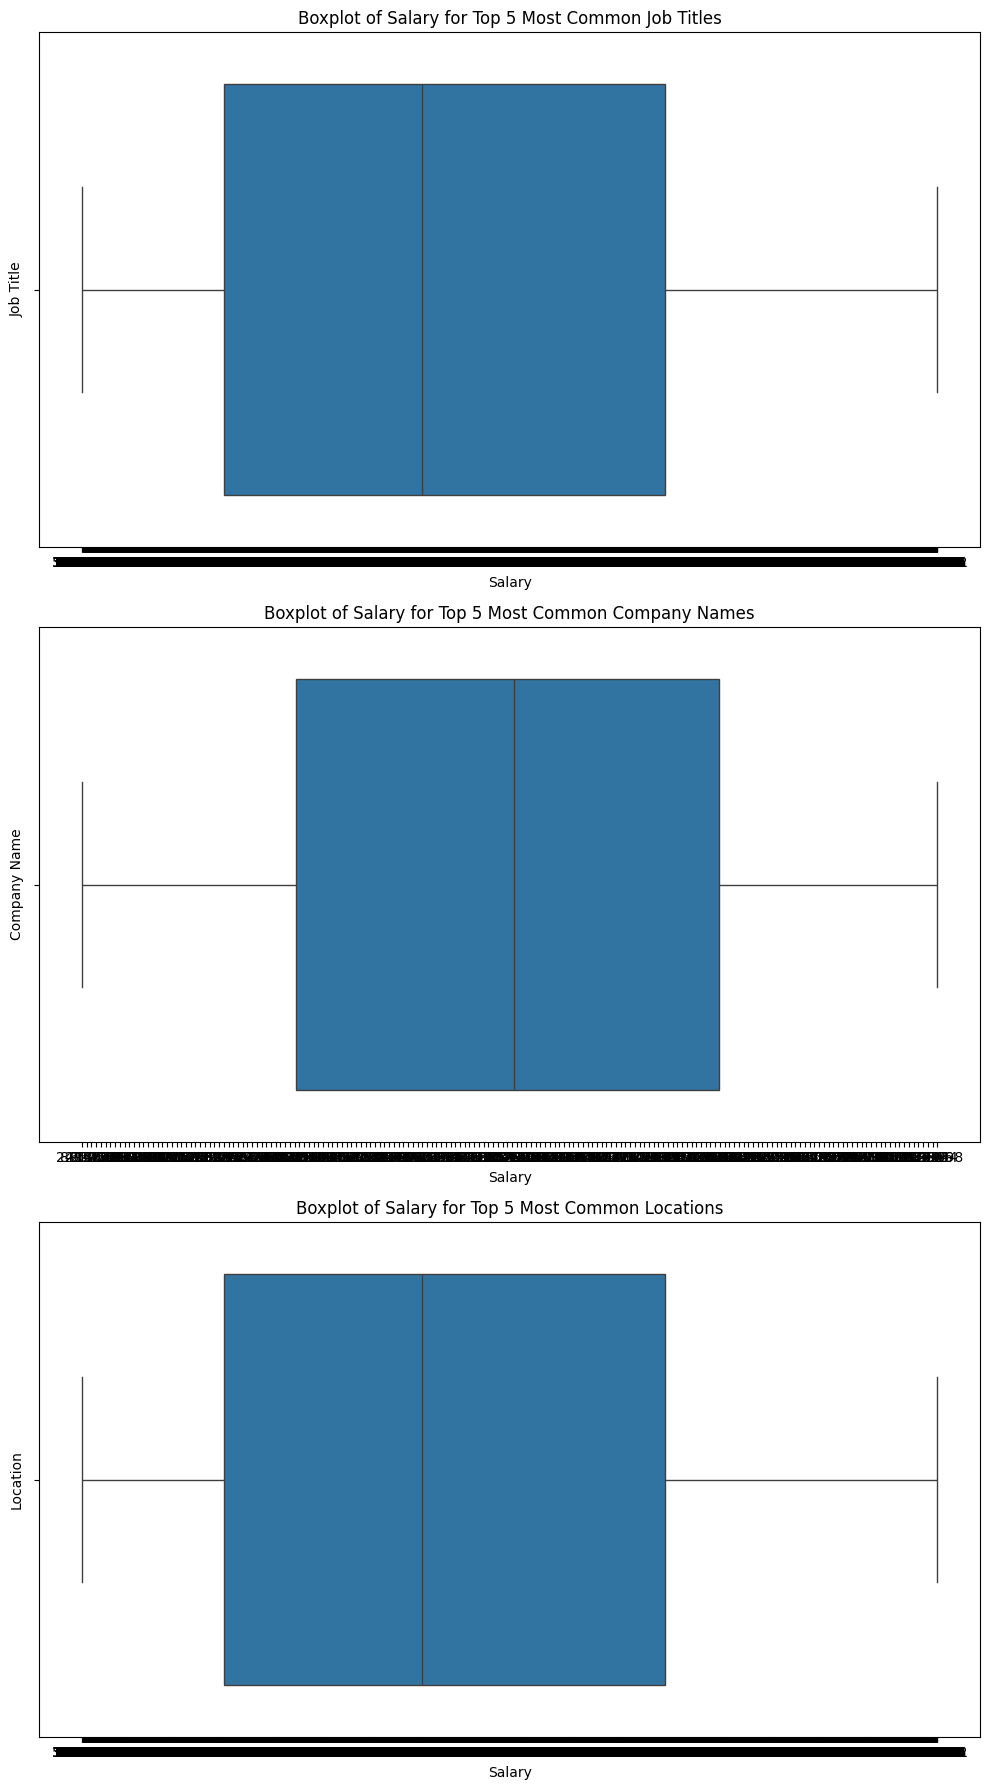

In [283]:
# produce the code that shows the potential outliers and take care of them as you see fit

import matplotlib.pyplot as plt
import seaborn as sns

# the top 5 most common job titles, companies, and locations
top_job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Data Science']
top_companies = ['Tata Consultancy Services', 'Accenture', 'Amazon', 'Fresher', 'First Student']
top_locations = ['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai']

# subplots for each category
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# visualize potential outliers for each category
for idx, (category, top_values) in enumerate(zip(['Job Title', 'Company Name', 'Location'],
                                                  [top_job_titles, top_companies, top_locations])):
    sns.boxplot(x='Salary', data=df_india[df_india[category].isin(top_values)], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of Salary for Top 5 Most Common {category}s')
    axes[idx].set_xlabel('Salary')
    axes[idx].set_ylabel(category)

plt.tight_layout()
plt.show()


<ul>
<li>If we want to correlate upon categories (ordinal or binary), we need to use factorize(). <b>Factorize the Role-column, and add the new column to the DataFrame.</b></li>
<ul>
<li><b>Note:</b> using <b>factorize()</b> for nominal categories (Job Title, Location, Company Name) doesn't work well, because the numbers do not have any numeric magnitude. In other words, these categories don't measure anything, they just group data, so numerical comparison / correlation doesn't mean anything statistically.</li>
</ul>
</ul>

In [284]:
# example:
# factorize Role level into numbers
# label1, unique1 = pd.factorize(df['Role'], sort=False)
# df['ManagerRole'] = label1

# produce the needed factorization for Role-column

labels, unique_roles = pd.factorize(df_india['Role'], sort=False)

df_india['Role_Factorized'] = labels

print("Unique Roles:", unique_roles)
print("\nFactorized Roles:")
print(df_india[['Role', 'Role_Factorized']].head())

Unique Roles: Index(['Specialist', 'Manager'], dtype='object')

Factorized Roles:
         Role  Role_Factorized
0  Specialist                0
1     Manager                1
2     Manager                1
3  Specialist                0
4  Specialist                0


<ul>
<li><b>Finally, check out the correlations. Does anything correlate with anything? Can we make any assumptions?</b></li>
<ul>
<li>Tip: When correlating against binary variables, sometimes the Spearman correlation might be more sensitive, in pandas:</li>
</ul>
</ul>

In [285]:
# Remember: df.corr(method="spearman")

# select only numeric columns
numeric_df = df_india.select_dtypes(include=['int64', 'float64'])

correlation_spearman = numeric_df.corr(method="spearman")

print("Spearman Correlation:")
print(correlation_spearman)


Spearman Correlation:
                   Salaries Reported  Yearly Salary  Role_Factorized
Salaries Reported           1.000000      -0.072676        -0.254414
Yearly Salary              -0.072676       1.000000         0.430317
Role_Factorized            -0.254414       0.430317         1.000000


<b>Extra tasks for this dataset</b><br><br>

<ul>
<li>After all salaries have been converted to correct format by using the helper function (check Moodle), use quantiles and split the data into four different parts:</li>
<ul>
<li><span style="color: red;">Top 25%</span><br>=> quantile(0.75)</li>
<li><span style="color: red;">Above average, values between top 25-50%</span><br>
=> quantile(0.5)  - quantile(0.75)</li>
<li><span style="color: red;">Below average, values between top 50-75% </span><br>
=> quantile(0.25) – quantile(0.5)
</li>
<li><span style="color: red;">Bottom 25%</span><br>=> quantile(0.25)</li>
<br>
<li>What are the salary ranges for each quantile?</li><li>
See examples in pandas-materials on how to use quantiles
</li>
</ul>
</ul>
<hr>

<ul>
<li>Did you get any ideas how this data could be improved? Do we need some particular new data or some other operations on the data? Should we filter something out based on some other column?<br><br><b>Provide arguments for your answers in code comments.</b><br><br> </li>
<ul>
<li>Note: There are many good possible answers here!</li>
<li>Tip: How about replacing the "Salaries Reported" column with actual rows based on that number? Try doing this with the data!</li>
<li>Remember: This data only represents data engineering salaries based on selected Indian cities.
The world is a vast place :)
</li>
</ul>
</ul>

In [286]:
# code for the extra tasks



<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>1. Data merge is a useful tool when you have multiple files of data that have the exact same structure.</b><br><br>Download the two csv-files from Moodle (videogames1.csv, videogames2.csv), and combine them into one Data Frame. Lastly, save the Data Frame into a new csv-file => combined.csv.</li>
</ul>

In [287]:
# code for the advanced extra task

<ul>
<li><b>2. Functions and lambdas allow us to extend the operations we wish to do to columns and rows in pandas. </b><br><br>For example, the built-in functions may not be enough in all cases. Use the data of exercise 1 (loans.csv), and create a new column called "Income Group" that holds a text value. <br><br>Create either a function or a lambda, that determines the True or False –value based on the Annual Income –column. Use the following table to create the values:</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_3.png"/>

<li>After creating the function/lambda, you can use it by using pandas' .apply() –function.<br><br></li>

<li>Finally, get the amount of rows grouped by each of the new Income Group –field values and print them out.</li> 


In [288]:
# code for the advanced extra task

def determine_income_group(income):
    if income < 25000:
        return '$25k or less'
    elif 25001 <= income < 50000:
        return '$25k - $50k'
    elif 50001 <= income < 100000:
        return '$50k - $100k'
    elif 100001 <= income < 200000:
        return '$100k - $200k'
    else:
        return '$200k+'

df['Income Group'] = df['Annual Income'].apply(determine_income_group)
income_group_counts = df['Income Group'].value_counts()

print("Rows grouped by Income Group:")
print(income_group_counts)

Rows grouped by Income Group:
Income Group
$200k+           69273
$100k - $200k       86
$50k - $100k         3
Name: count, dtype: int64


<ul>
<li><b>3.	Normalization allows us to convert the values of numeric columns to be between 0 and 1.</b> This is helpful when two different numbers seem to follow the same trend, but have completely different value ranges. For example, gold and silver prices tend to follow similar patterns, but their market worth is quite different. By using normalization, we can compare these trends more easily. <br>

Get historical prices of both gold and silver, and compare them without and with normalization. You can plot the prices by using df.plot() –function. Check the dataset in list in Moodle for some alternatives for gold and silver prices.
</li>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_4.png" />

<ul>
<li><b>4.	Create an account to kaggle.com, and find any dataset that interests you. </b><br>

There's a list of possibly interesting datasets listed in Moodle as well.
<br><br>
<b>Try to find interesting features in data, in particular:</b>
</li>
<ul>
<li>Clean up data first (rows with too many NaN –values), values that are way too big or small, insignificant columns etc.)</li>
<li>You can create new columns as well if it seems suitable! (either by using functions or other means)</li>
<li>Interesting correlations (.corr() –function) and other interesting features in the data. Is something surprising in the data?</li>
<li><b>Note: </b>There are many ways on how to approach this exercise.</li>
</ul>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [289]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding